# Autocorrelation and prediction intervals

## The correlogram

Notes for Open University M249 Time Series book 2 - section 9.1

In [11]:
! python -c 'import datapackage' || pip install datapackage

In [56]:
%matplotlib inline

import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/bond-yields-uk-10y/datapackage.json'

resources = datapackage.Package(data_url).resources

quarterly_csv_url = [pkg for pkg in resources if pkg.name == 'quarterly_csv'][0].descriptor['path']
data = pd.read_csv(quarterly_csv_url)
data = data.set_index('Date', drop=True).asfreq('Q')
data.head()

,Rate
Date,
1984-03-31,10.9817
1984-06-30,11.5721
1984-09-30,11.9866
1984-12-31,11.1937
1985-03-31,11.6959


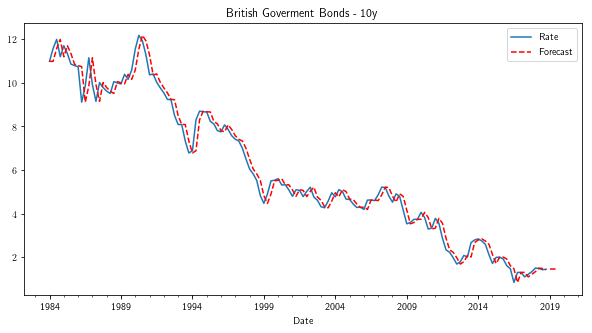

In [72]:
%matplotlib inline

from statsmodels.tsa.api import SimpleExpSmoothing
import statsmodels as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fit = SimpleExpSmoothing(data).fit()
fcast = fit.forecast(3).rename('Forecast')

plt.rcParams["figure.figsize"] = (10,5)

ax = data.plot(legend=True, title='British Goverment Bonds - 10y')
ax.set_xlabel('yield')
_ = fit.fittedvalues.plot(ax=ax, linestyle='--', color='red')   # predicted past
_ = fcast.plot(ax=ax, color='red', linestyle='--', legend=True) # predicted future

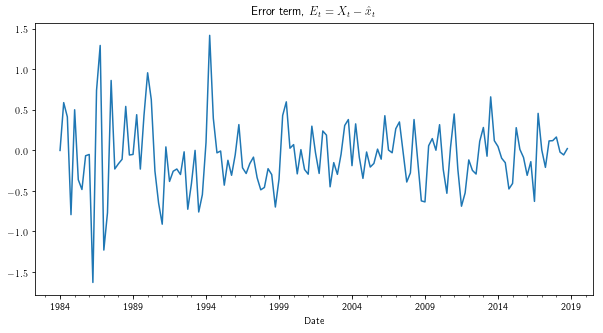

In [73]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rc('text', usetex=True)
_ = (data['Rate'] - fit.fittedvalues).plot(title='Error term, $E_t = X_t - \hat{x}_t$')